<a href="https://colab.research.google.com/github/Ramachandra89/Diffusion_Model/blob/main/GenerativeAI_Practice_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing the pre-requisites
%pip install -qq diffusers datasets accelerate wandb open-clip-torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Importing the required modules
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

In [ ]:

#Setting the device based on hardware availability to mps or cuda otherwise set it to cpu for PyTorch operations
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)


In [ ]:
print(device)

cuda


In [ ]:
def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    """ B x C x H x W"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im


# Question1 :  Load the pretrained pipeline "google/ddpm-celebahq-256"

In [ ]:
# We will load the model id "google/ddpm-celebahq-256"  from DDMP pretrained pipeline.
# You can find reference on how to load this pipeline here :  https://huggingface.co/google/ddpm-celebahq-256
# once the pipeline is loaded , generate unconditional images from it

from diffusers import DDPMPipeline

butterfly_pipeline = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
butterfly_pipeline.to(device)

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

# Question 2 : Load the dataset you want to fine tune the model wth.Dataset name is "Norod78/Vintage-Faces-FFHQAligned" . Define image and batch size.

look at a random batch


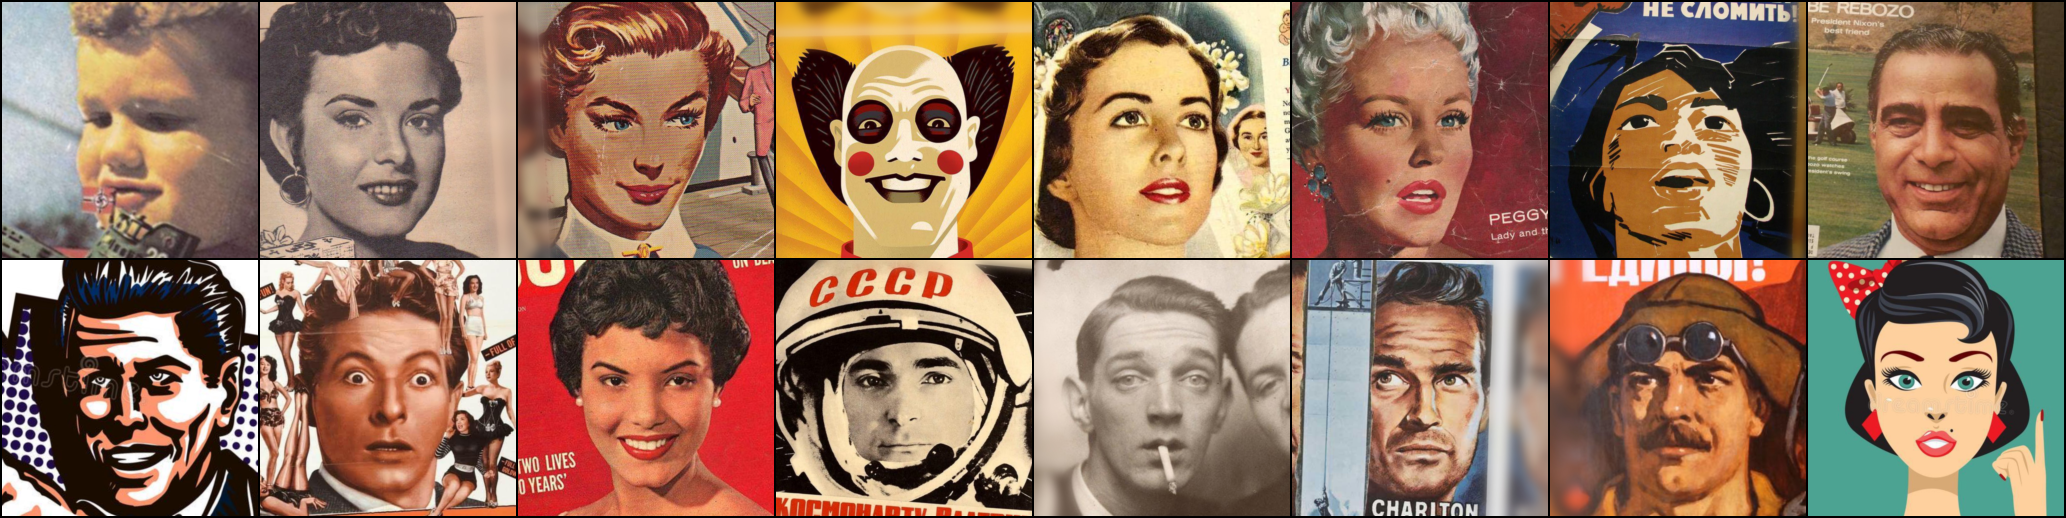

In [ ]:
# We will load the dataset "Norod78/Vintage-Faces-FFHQAligned" for finetuning .
# You can find the appropriate transformations and apply those transforms on this dataset.
# Create a train data loader post applying the transforms and preview some images from a batch

dataset_name = "Norod78/Vintage-Faces-FFHQAligned"
dataset = load_dataset(dataset_name)

image_size = 256
batch_size = 16

train_dataset = dataset["train"]

# transformations
preprocess = transforms.Compose(
    [
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

def transform(examples):
  images = [preprocess(image.convert("RGB")) for image in examples["image"]]
  return {"pixel_values": images}

dataset.set_transform(transform)



train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)


print("look at a random batch")

batch = next(iter(train_dataloader))

show_images(batch["pixel_values"])




# Question 3 : Update the optimizer Adamw with learning rate and model parameters from the butterfly pipeline created above

# Update below parameters: Epoch , leARNING rate , grdient accumulation steps

# Update the fine tuning loop .   It is similar to the training loop in last assignment when training diffuser models from scratch




In [ ]:
# Here we need to initialise the model parameters like epochs , learning rate and gradient accumulation steps.
# INitialise the optimiser of your choice
# Create a for loop which will take the input train data loader ,
# add sample noise to the images ,
# Get the model prediction for the noise
# Compare the prediction with the actual noise and update loss values
# Update the model parameters with the optimizer
# plot the loss curve